<a href="https://colab.research.google.com/github/Nadaramadan1/PythonProject/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Nada Ramadan - titanic-passengers - Nada Ramadan - titanic-passengers.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
data.drop(['PassengerId'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 76.7+ KB


In [7]:
data.shape

(891, 11)

In [8]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
data.drop('Cabin', axis=1, inplace=True)

In [11]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# One-hot encode Embarked
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [14]:
data.drop('Name', axis=1, inplace=True)

In [15]:
data['FareBand'] = pd.qcut(data['Fare'], 4, labels=[0,1,2,3])
data['FareBand'] = data['FareBand'].astype(int)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Fare'] = scaler.fit_transform(data[['Fare']])


In [17]:
numeric_col=data.select_dtypes(include=np.number).columns.tolist()
numeric_col

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FareBand']

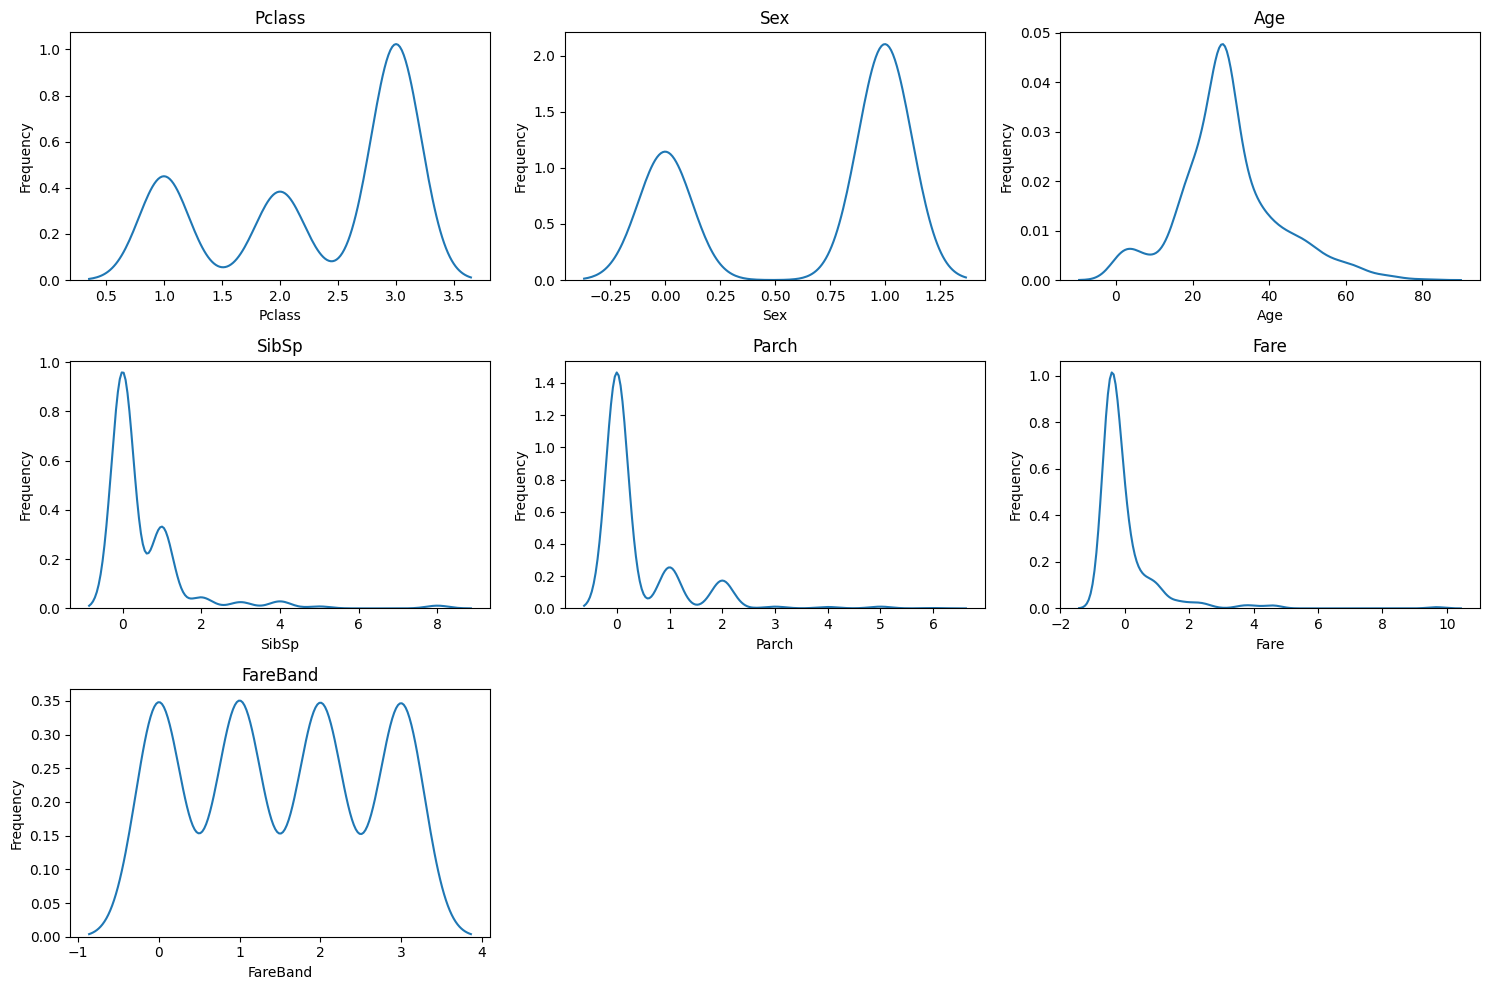

In [18]:
plt.figure(figsize=(15,10))
for col in numeric_col:
  plt.subplot(3,3,numeric_col.index(col)+1)
  sns.kdeplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
plt.show()

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [20]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                          np.where(df[column] > upper, upper, df[column]))
    return df


/tmp/ipython-input-38-3049614072.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col])


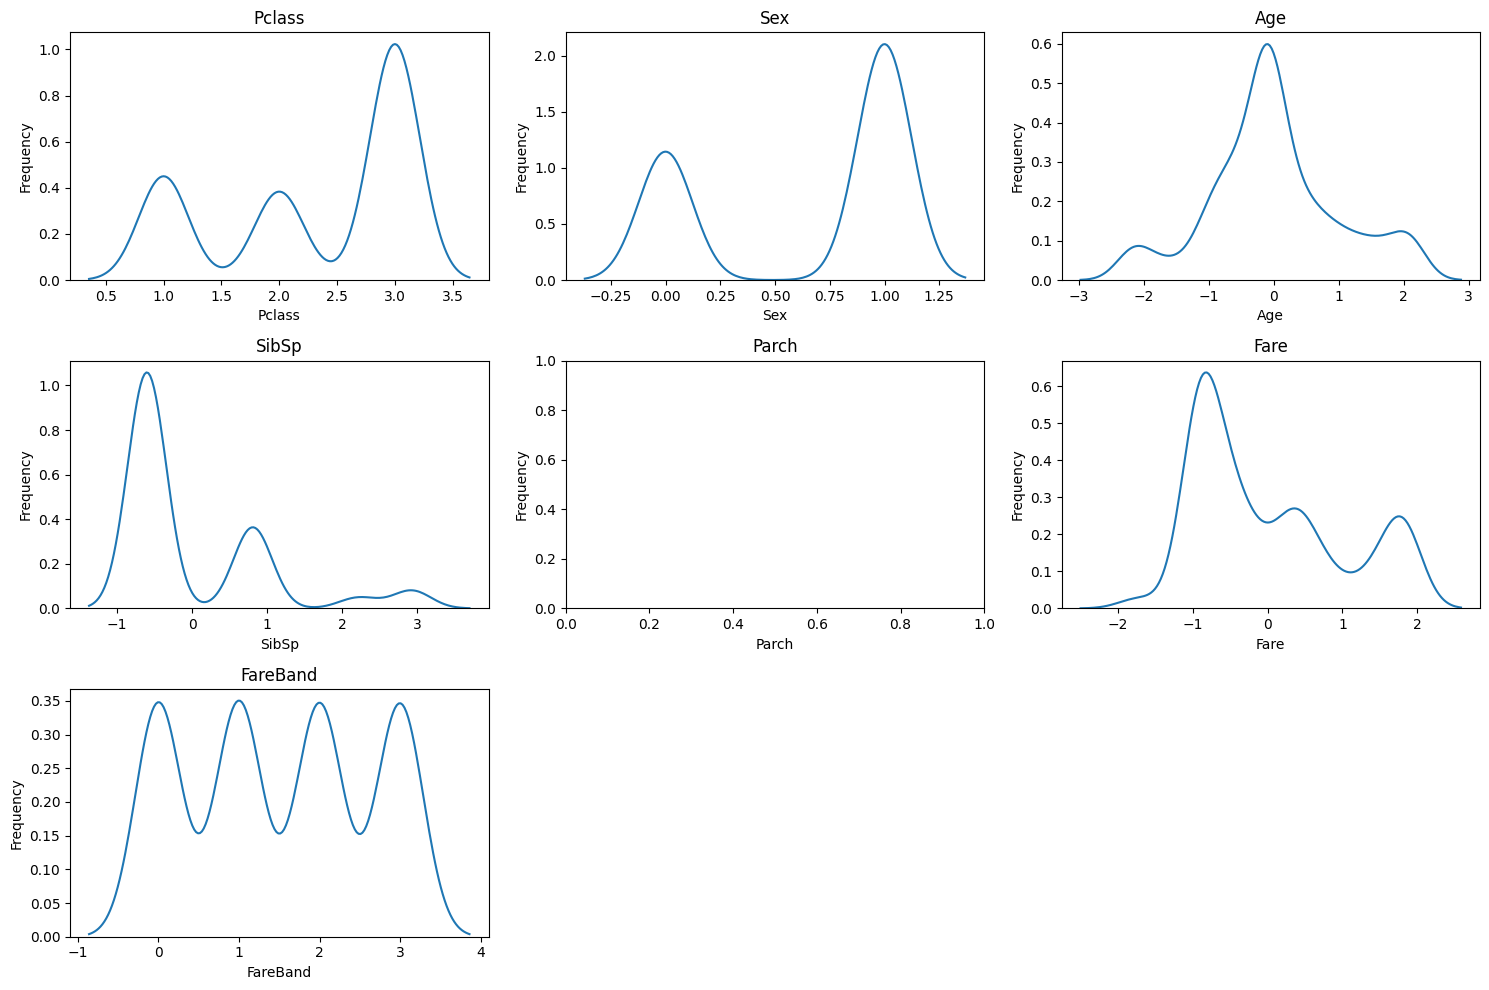

In [38]:
plt.figure(figsize=(15,10))
for col in numeric_col:
  plt.subplot(3,3,numeric_col.index(col)+1)
  sns.kdeplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
plt.show()

In [21]:
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    data = cap_outliers(data, col)


In [22]:
data['Fare'] = np.log1p(data['Fare'])  # log(1 + x) avoids log(0)


In [23]:
data.drop('Ticket', axis=1, inplace=True)

# Feature Engineering

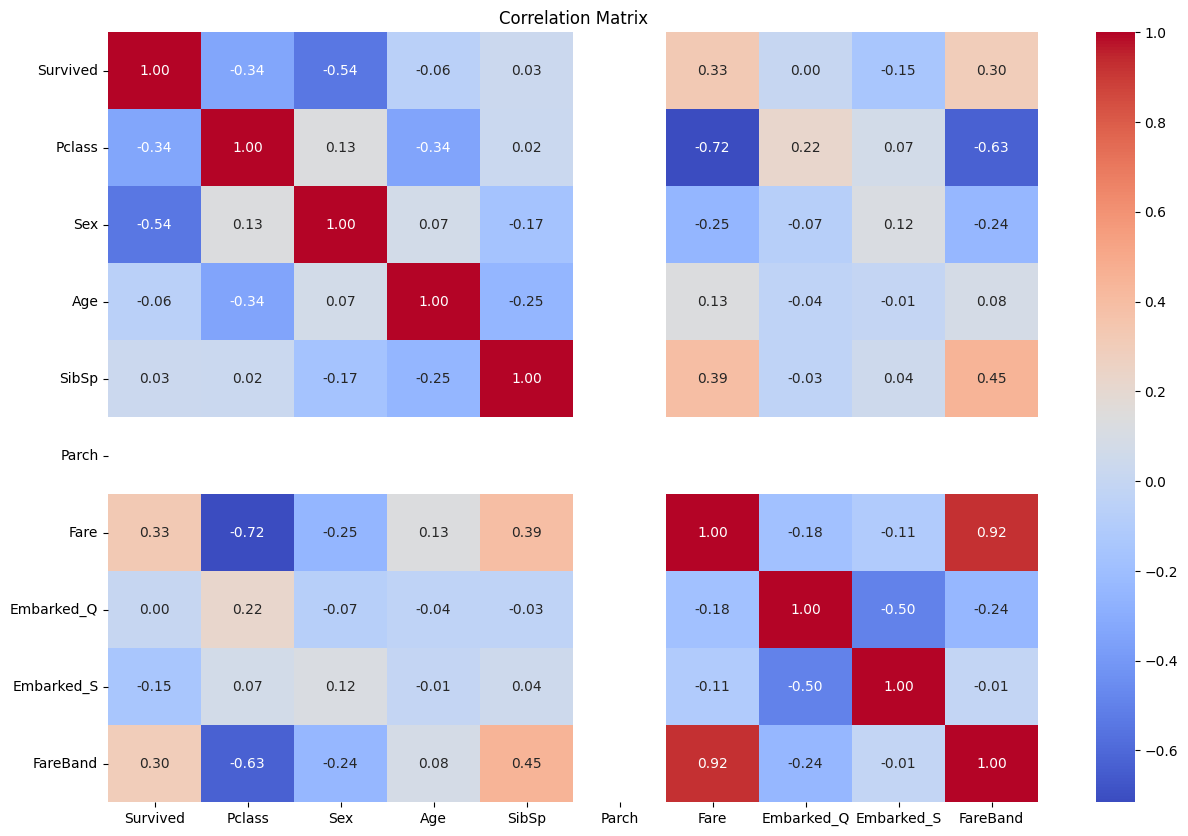

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the 'Survived' column
data['Survived'] = data['Survived'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)


In [27]:
data['Pclass_Sex'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str)
data = pd.get_dummies(data, columns=['Pclass_Sex'], drop_first=True)


In [28]:
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [29]:
# Separate features and target
X = data.drop('Survived', axis=1)
y = data['Survived']


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Dicision tree model

In [41]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [42]:
y_pred = dtree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
Confusion Matrix:
 [[99 15]
 [18 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       114
           1       0.76      0.72      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



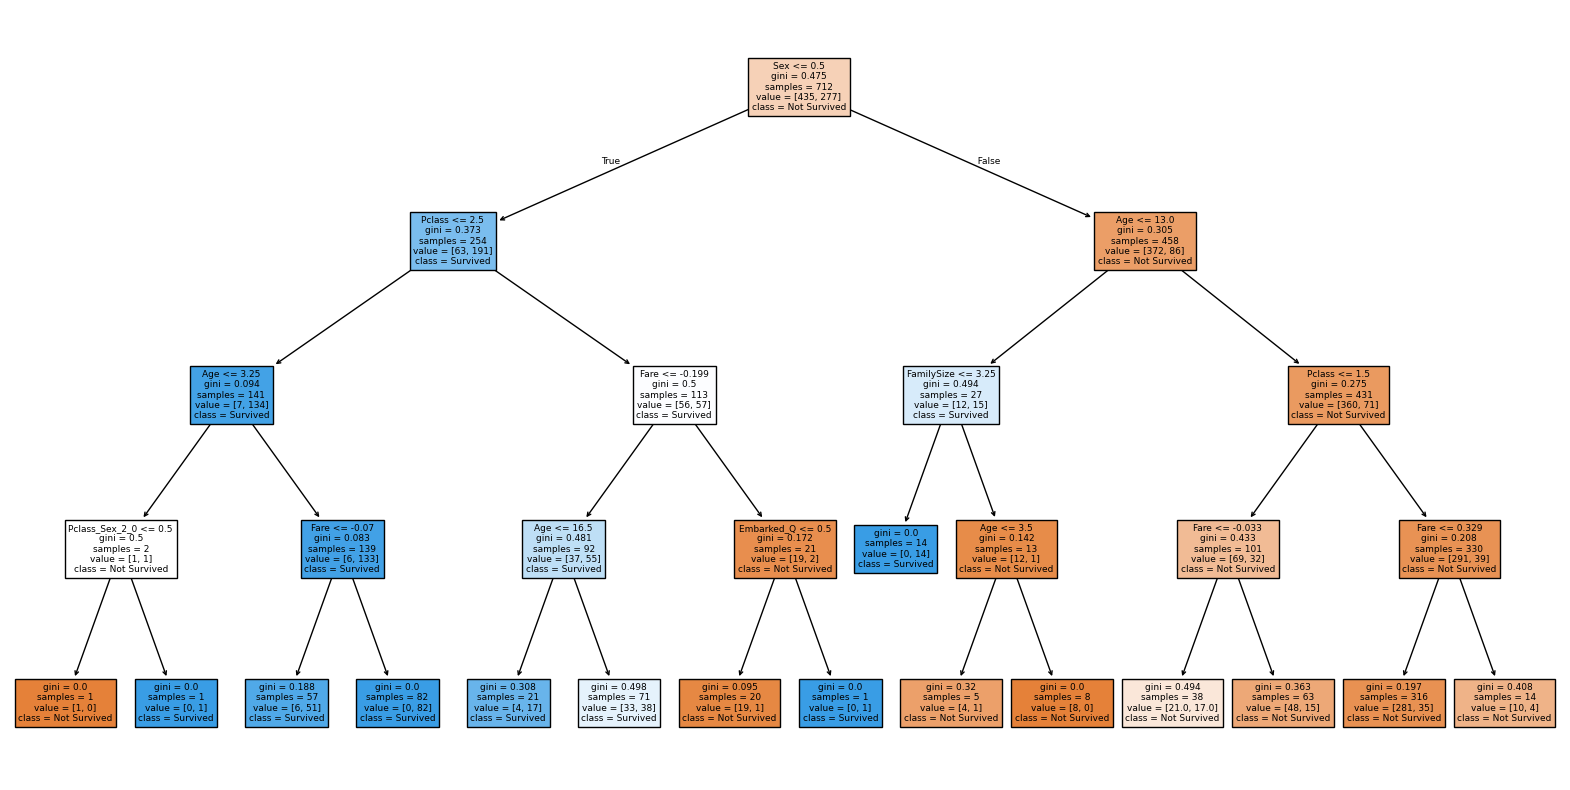

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


# Tuned dicision tree model

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8215798286220821


# random forest model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
Confusion Matrix:
 [[99 15]
 [18 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       114
           1       0.76      0.72      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



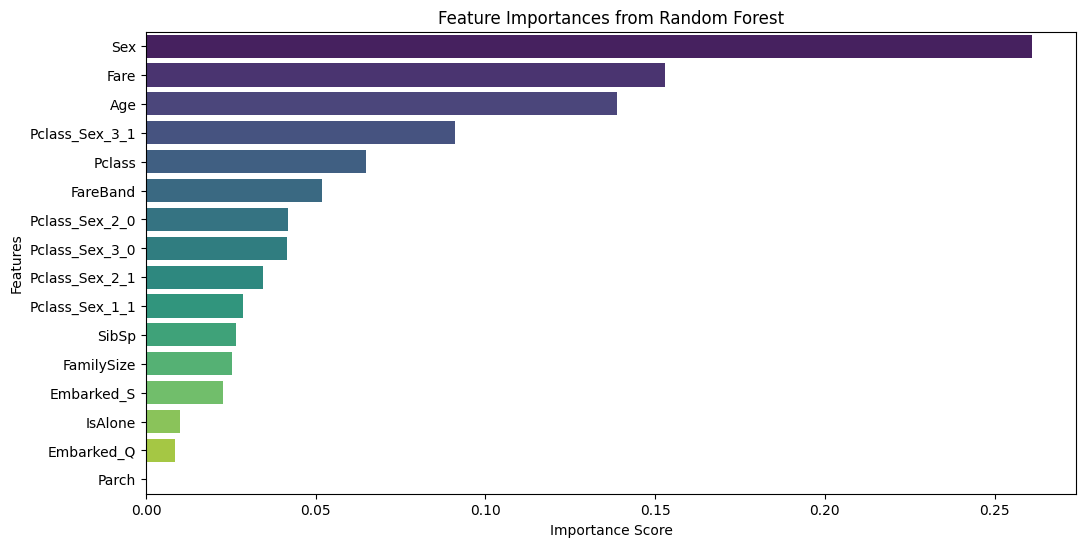

In [68]:
import seaborn as sns
import pandas as pd

# Get feature importances
importances = rf_best.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=features.values, y=features.index, palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# XGboost model

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [52]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<Figure size 1200x800 with 0 Axes>

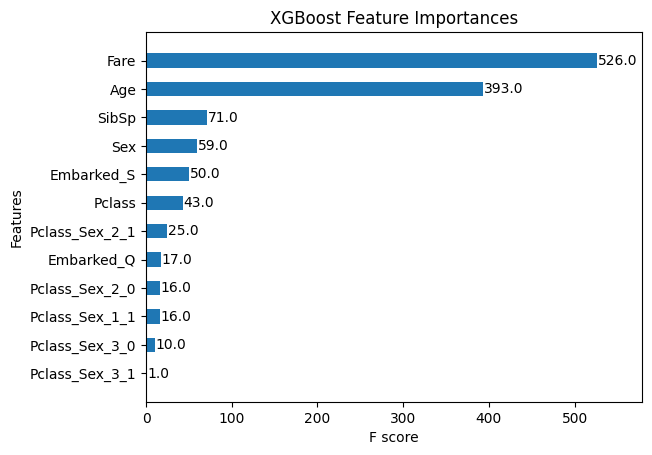

In [69]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importances from the tuned XGBoost model
plt.figure(figsize=(12, 8))
plot_importance(xgb_best, importance_type='weight', max_num_features=15, height=0.5, grid=False)
plt.title("XGBoost Feature Importances")
plt.show()


In [53]:
y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.8324022346368715
Confusion Matrix:
 [[103  11]
 [ 19  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       114
           1       0.81      0.71      0.75        65

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



# tuned random forest model

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best RF Parameters:", rf_grid.best_params_)
print("Best RF Score:", rf_grid.best_score_)


Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Score: 0.8285728356150892


# tuned XGboost model

In [59]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGB Parameters:", xgb_grid.best_params_)
print("Best XGB Score:", xgb_grid.best_score_)


Best XGB Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best XGB Score: 0.8426474933517187


In [60]:
dt_best = grid_search.best_estimator_
y_pred_dt = dt_best.predict(X_test)


In [61]:
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)


In [62]:
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)


# evaluation

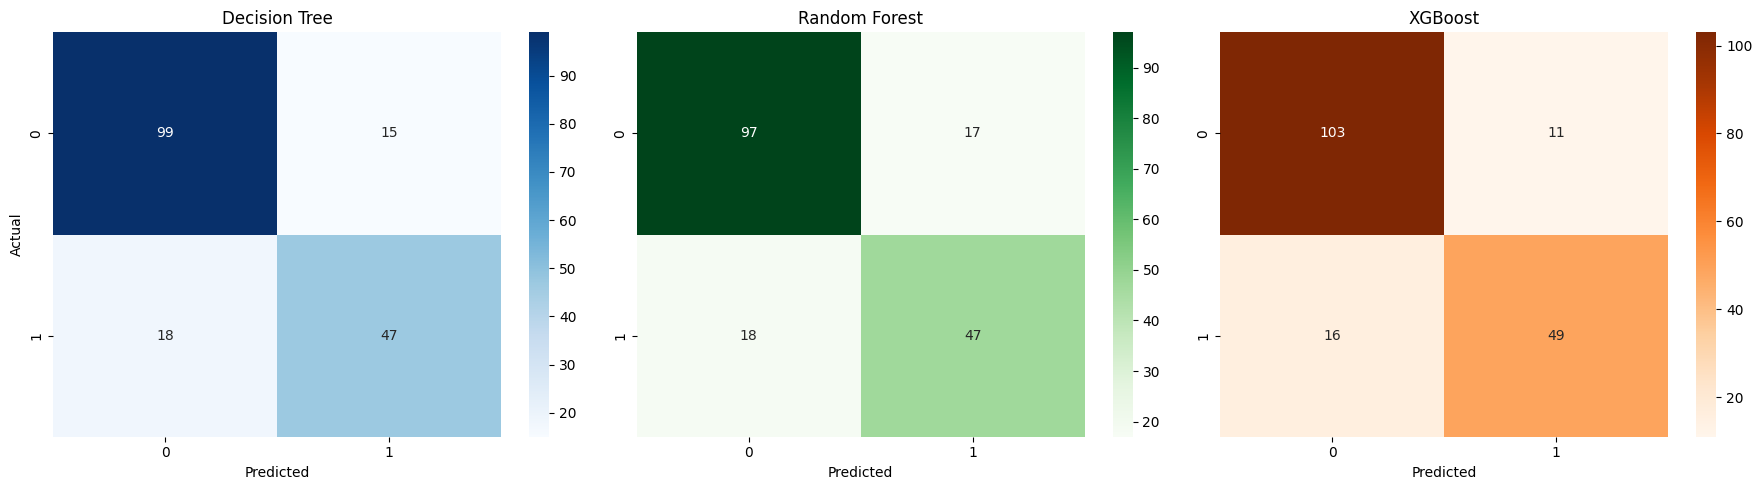

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

# XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('XGBoost')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


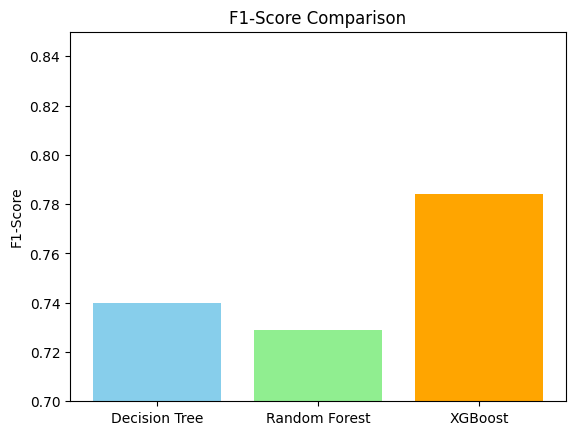

In [66]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'XGBoost']
f1_scores = [0.740, 0.729, 0.784]

plt.bar(models, f1_scores, color=['skyblue', 'lightgreen', 'orange'])
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.ylim(0.7, 0.85)
plt.show()


In [65]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification reports as dictionaries
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Extract F1-score, precision, and recall for class 1 (Survived)
summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Precision (1)': [report_dt['1']['precision'], report_rf['1']['precision'], report_xgb['1']['precision']],
    'Recall (1)': [report_dt['1']['recall'], report_rf['1']['recall'], report_xgb['1']['recall']],
    'F1-score (1)': [report_dt['1']['f1-score'], report_rf['1']['f1-score'], report_xgb['1']['f1-score']],
    'Accuracy': [
        report_dt['accuracy'],
        report_rf['accuracy'],
        report_xgb['accuracy']
    ]
})

# Round for readability
summary = summary.round(3)
summary


,Model,Precision (1),Recall (1),F1-score (1),Accuracy
0,Decision Tree,0.758,0.723,0.740,0.816
1,Random Forest,0.734,0.723,0.729,0.804
2,XGBoost,0.817,0.754,0.784,0.849
